In [46]:
import geocoder

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
import pandas as pd
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Mercer Street and Canal Street")
print(location.latitude,location.longitude)

40.2178217 -74.7605964143422


'40.7410861'

In [104]:
df = pd.read_csv('aadt_cleaned.csv')

In [105]:
df = df.drop(df.columns[0], axis=1)

In [106]:
df

,Roadway Begin Description,Roadway End Description,Road Name,AADT
0,NAVY ST,BROADWAY,PARK AVE,10402
1,CANAL ST,E 8TH ST,MERCER ST,3304
2,EBBITTS AVE,GARIBALDI AVE,ROMA AVE,496
3,4TH AVE,SECOND AVE,65TH ST,3703
4,AVE X,86TH ST,W 8TH ST,3867
5,END 1/95I OLAP WEBSTER AVE,E FORDHAM RD,WEBSTER AVE,16106
6,END 1/95I OLAP WEBSTER AVE,E FORDHAM RD,WEBSTER AVE,16156
7,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35426
8,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35537
9,RT 907H BRONX RIVER PKWY SOU,PELHAM PKWY BOSTON POST RD R,E FORDHAM RD,47905


In [142]:
for d in range(5443,len(df)):
    street1 = df.at[d,'Roadway Begin Description']
    street2 = df.at[d,'Road Name']
    street3 = street1+ ' '+street2
    g = geocoder.google(street3)
    if len(g.latlng)>0:
        df.at[d,'latlng'] = str(g.latlng[0]) + ',' + str(g.latlng[1])
#         print((g.latlng))
    else:
        street3 = street2+' '+street1
        g = geocoder.google(street3)
        if len(g.latlng)>0:
            df.at[d,'latlng'] = str(g.latlng[0]) + ',' + str(g.latlng[1])

In [146]:
df.to_csv('latlngData.csv')

In [44]:
import geocoder

In [61]:
g = geocoder.google('Mountain View, CA')
print(g.latlng[0])

<class 'float'>


In [161]:
df2 = pd.read_csv('aadt_gps.csv')

In [162]:
df2
df2 = df2.drop(df2.columns[0], axis=1)

In [163]:
df2

,Roadway Begin Description,Roadway End Description,Road Name,AADT,latlng
0,NAVY ST,BROADWAY,PARK AVE,10402,"40.6969737,-73.97945519999999"
1,CANAL ST,E 8TH ST,MERCER ST,3304,"40.7257515,-73.9976728"
2,EBBITTS AVE,GARIBALDI AVE,ROMA AVE,496,"40.5611642,-74.1040998"
3,4TH AVE,SECOND AVE,65TH ST,3703,"47.6759491,-122.32457"
4,AVE X,86TH ST,W 8TH ST,3867,"34.0576596,-118.3076198"
5,END 1/95I OLAP WEBSTER AVE,E FORDHAM RD,WEBSTER AVE,16106,NaN
6,END 1/95I OLAP WEBSTER AVE,E FORDHAM RD,WEBSTER AVE,16156,NaN
7,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35426,"40.8589734,-73.8862766"
8,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35537,NaN
9,RT 907H BRONX RIVER PKWY SOU,PELHAM PKWY BOSTON POST RD R,E FORDHAM RD,47905,NaN


In [165]:
df2=df2[pd.notnull(df2['latlng'])]
df2

,Roadway Begin Description,Roadway End Description,Road Name,AADT,latlng
0,NAVY ST,BROADWAY,PARK AVE,10402,"40.6969737,-73.97945519999999"
1,CANAL ST,E 8TH ST,MERCER ST,3304,"40.7257515,-73.9976728"
2,EBBITTS AVE,GARIBALDI AVE,ROMA AVE,496,"40.5611642,-74.1040998"
3,4TH AVE,SECOND AVE,65TH ST,3703,"47.6759491,-122.32457"
4,AVE X,86TH ST,W 8TH ST,3867,"34.0576596,-118.3076198"
7,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35426,"40.8589734,-73.8862766"
11,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,BOSTON RD,15079,"40.89156089999999,-73.817953"
12,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,BOSTON RD,15126,"40.89649259999999,-73.8050574"
13,GUN HILL RD,RT 22 PROVOST AVE,BOSTON RD,21199,"40.873512,-73.854012"
14,GUN HILL RD,RT 22 PROVOST AVE,BOSTON RD,21265,"40.873512,-73.854012"


In [166]:
df2 = df2[df2['latlng']>str(40)]

In [167]:
df2

,Roadway Begin Description,Roadway End Description,Road Name,AADT,latlng
0,NAVY ST,BROADWAY,PARK AVE,10402,"40.6969737,-73.97945519999999"
1,CANAL ST,E 8TH ST,MERCER ST,3304,"40.7257515,-73.9976728"
2,EBBITTS AVE,GARIBALDI AVE,ROMA AVE,496,"40.5611642,-74.1040998"
3,4TH AVE,SECOND AVE,65TH ST,3703,"47.6759491,-122.32457"
7,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35426,"40.8589734,-73.8862766"
11,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,BOSTON RD,15079,"40.89156089999999,-73.817953"
12,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,BOSTON RD,15126,"40.89649259999999,-73.8050574"
13,GUN HILL RD,RT 22 PROVOST AVE,BOSTON RD,21199,"40.873512,-73.854012"
14,GUN HILL RD,RT 22 PROVOST AVE,BOSTON RD,21265,"40.873512,-73.854012"
20,DYCKMAN ST,NY/BRONX CO LINE,BROADWAY,31007,"40.8657445,-73.9270717"


In [168]:
df2 = df2.reset_index(drop=True)

In [169]:
df2

,Roadway Begin Description,Roadway End Description,Road Name,AADT,latlng
0,NAVY ST,BROADWAY,PARK AVE,10402,"40.6969737,-73.97945519999999"
1,CANAL ST,E 8TH ST,MERCER ST,3304,"40.7257515,-73.9976728"
2,EBBITTS AVE,GARIBALDI AVE,ROMA AVE,496,"40.5611642,-74.1040998"
3,4TH AVE,SECOND AVE,65TH ST,3703,"47.6759491,-122.32457"
4,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,E FORDHAM RD,35426,"40.8589734,-73.8862766"
5,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,BOSTON RD,15079,"40.89156089999999,-73.817953"
6,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,BOSTON RD,15126,"40.89649259999999,-73.8050574"
7,GUN HILL RD,RT 22 PROVOST AVE,BOSTON RD,21199,"40.873512,-73.854012"
8,GUN HILL RD,RT 22 PROVOST AVE,BOSTON RD,21265,"40.873512,-73.854012"
9,DYCKMAN ST,NY/BRONX CO LINE,BROADWAY,31007,"40.8657445,-73.9270717"


In [171]:
df2.to_csv('aadt_gps_cleaned.csv')

In [208]:
g = geocoder.google([45.15,-75.14], method='reverse')

In [209]:
g.debug()

{
    "postal_code": {},
    "location": {},
    "locality": {},
    "sublocality": {},
    "administrative_area_level_2": {},
    "northeast": {},
    "country": {},
    "subpremise": {},
    "neighborhood": {},
    "administrative_area_level_1": {},
    "status": "INVALID_REQUEST",
    "results": [],
    "postal_town": {},
    "southwest": {},
    "street_number": {},
    "route": {},
    "error_message": "Invalid request. Invalid 'latlng' parameter."
}
{
    "status_code": 200,
    "location": "45.15, -75.14",
    "encoding": "utf-8",
    "provider": "google",
    "status": "INVALID_REQUEST",
    "ok": false
}

OSM Quality
-----------
(0/-2)

Fieldnames
----------
- [ ] accuracy
- [ ] address
- [ ] bbox
- [ ] city
- [ ] client
- [ ] client_secret
- [ ] confidence
- [ ] country
- [ ] county
- [x] encoding
- [ ] housenumber
- [ ] lat
- [ ] lng
- [x] location
- [ ] neighborhood
- [ ] ok
- [ ] place
- [ ] postal
- [ ] postal_town
- [x] provider
- [ ] quality
- [ ] state
- [x] status
- [

In [3]:
location = geolocator.reverse("40.820189,-73.8906752")

NameError: name 'geolocator' is not defined

In [288]:
location.raw['address']['postcode']

'10472'

In [289]:
location.raw

{'address': {'city': 'NYC',
  'country': 'United States of America',
  'country_code': 'us',
  'county': 'Bronx County',
  'neighbourhood': 'Hunts Point',
  'park': 'Del Valle Square',
  'postcode': '10472',
  'road': 'Bruckner Boulevard',
  'state': 'New York',
  'suburb': 'Bronx'},
 'boundingbox': ['40.8204512', '40.8210196', '-73.8914092', '-73.8900306'],
 'display_name': 'Del Valle Square, Bruckner Boulevard, Hunts Point, Bronx, Bronx County, NYC, New York, 10472, United States of America',
 'lat': '40.8206867',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright',
 'lon': '-73.8907829225018',
 'osm_id': '237040790',
 'osm_type': 'way',
 'place_id': '119465840'}

In [290]:
location.raw['address']['suburb']

'Bronx'

In [165]:
aadt = pd.read_csv('aadt_zip_clean.csv', low_memory=False)

In [160]:
aadt[aadt['BOROUGH'].isnull()]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
799062,07/04/2012,22:15,NaN,NaN,40.756729,-73.959993,"(40.7567287,-73.9599934)",NaN,NaN,NaN,2,0,0,0,0,0,2,0,Outside Car Distraction,NaN,NaN,NaN,NaN,2840712,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,7027.000000,3.353016,40.76,-73.96
799069,07/04/2012,22:30,NaN,NaN,40.748968,-73.758159,"(40.7489684,-73.7581594)",NaN,NaN,NaN,2,0,0,0,0,0,2,0,Outside Car Distraction,Fatigued/Drowsy,NaN,NaN,NaN,3078726,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1888.000000,14.221036,40.75,-73.76
799070,07/04/2012,22:43,NaN,NaN,40.744895,-73.770204,"(40.7448949,-73.7702044)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,3078725,PASSENGER VEHICLE,VAN,NaN,NaN,NaN,14068.312786,5.647589,40.74,-73.77
799078,07/04/2012,23:00,NaN,NaN,40.692726,-73.726718,"(40.6927264,-73.726718)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3016728,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,4464.000000,6.382874,40.69,-73.73
799087,07/04/2012,23:15,NaN,NaN,40.664843,-73.822285,"(40.6648434,-73.8222846)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3023343,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,14068.312786,1.947445,40.66,-73.82
799089,07/04/2012,23:20,NaN,NaN,40.611099,-74.114659,"(40.6110986,-74.1146592)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,3121376,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,6475.000000,5.923732,40.61,-74.11
799090,07/04/2012,23:20,NaN,NaN,40.786141,-73.939280,"(40.7861411,-73.9392802)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,2853430,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,8208.000000,8.945499,40.79,-73.94
799103,07/04/2012,2:05,NaN,NaN,40.806346,-73.933172,"(40.8063462,-73.9331715)",NaN,NaN,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,2864069,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,14964.000000,4.284255,40.81,-73.93
799125,07/04/2012,6:25,NaN,NaN,40.696666,-73.980841,"(40.6966659,-73.9808413)",NaN,NaN,NaN,1,0,0,0,0,0,1,0,Unspecified,NaN,NaN,NaN,NaN,2983047,UNKNOWN,NaN,NaN,NaN,NaN,10527.000000,6.090015,40.70,-73.98
799151,07/04/2012,8:30,NaN,NaN,40.716716,-73.827812,"(40.7167161,-73.8278116)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3089469,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,9445.000000,2.320573,40.72,-73.83


In [161]:
aadt[aadt['ZIP CODE'].isnull()]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
799062,07/04/2012,22:15,NaN,NaN,40.756729,-73.959993,"(40.7567287,-73.9599934)",NaN,NaN,NaN,2,0,0,0,0,0,2,0,Outside Car Distraction,NaN,NaN,NaN,NaN,2840712,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,7027.000000,3.353016,40.76,-73.96
799069,07/04/2012,22:30,NaN,NaN,40.748968,-73.758159,"(40.7489684,-73.7581594)",NaN,NaN,NaN,2,0,0,0,0,0,2,0,Outside Car Distraction,Fatigued/Drowsy,NaN,NaN,NaN,3078726,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1888.000000,14.221036,40.75,-73.76
799070,07/04/2012,22:43,NaN,NaN,40.744895,-73.770204,"(40.7448949,-73.7702044)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,3078725,PASSENGER VEHICLE,VAN,NaN,NaN,NaN,14068.312786,5.647589,40.74,-73.77
799078,07/04/2012,23:00,NaN,NaN,40.692726,-73.726718,"(40.6927264,-73.726718)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3016728,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,4464.000000,6.382874,40.69,-73.73
799087,07/04/2012,23:15,NaN,NaN,40.664843,-73.822285,"(40.6648434,-73.8222846)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3023343,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,14068.312786,1.947445,40.66,-73.82
799089,07/04/2012,23:20,NaN,NaN,40.611099,-74.114659,"(40.6110986,-74.1146592)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Other Vehicular,Unspecified,NaN,NaN,NaN,3121376,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,6475.000000,5.923732,40.61,-74.11
799090,07/04/2012,23:20,NaN,NaN,40.786141,-73.939280,"(40.7861411,-73.9392802)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,2853430,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,8208.000000,8.945499,40.79,-73.94
799103,07/04/2012,2:05,NaN,NaN,40.806346,-73.933172,"(40.8063462,-73.9331715)",NaN,NaN,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,2864069,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,14964.000000,4.284255,40.81,-73.93
799125,07/04/2012,6:25,NaN,NaN,40.696666,-73.980841,"(40.6966659,-73.9808413)",NaN,NaN,NaN,1,0,0,0,0,0,1,0,Unspecified,NaN,NaN,NaN,NaN,2983047,UNKNOWN,NaN,NaN,NaN,NaN,10527.000000,6.090015,40.70,-73.98
799151,07/04/2012,8:30,NaN,NaN,40.716716,-73.827812,"(40.7167161,-73.8278116)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3089469,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,9445.000000,2.320573,40.72,-73.83


In [162]:
for d in range(799062,len(aadt)):
    empty_borough = aadt.at[d,'BOROUGH']
    empty_zip = aadt.at[d,'ZIP CODE']
    if str(empty_borough) == 'nan' or str(empty_zip) == 'nan':
        coordinates = aadt.at[d,'LOCATION']
        location = geolocator.reverse(coordinates[1:-1],timeout=1000)
        zip_code = location.raw['address']
        zip_code = zip_code.get('postcode', 'nan')
        aadt.at[d,'ZIP CODE']=zip_code
        borough = location.raw['address']['county'].split(' ')[0].upper()
        if borough == 'KINGS':
            aadt.at[d,'BOROUGH']= 'BROOKLYN'
        elif borough == 'NEW':
            aadt.at[d,'BOROUGH']= 'MANHATTAN'
        elif borough == 'RICHMOND':
            aadt.at[d,'BOROUGH']= 'STATEN ISLAND'
        else: 
            aadt.at[d,'BOROUGH']= borough

# Before any passes through script:

In [312]:
# aadt['BOROUGH'].isnull()
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

92595
92644


# 1st Run:

In [314]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

91811
91859


# 2nd Run:
dataframe from 0-7000 needs to be re-run or fixed for inconcistent county names

In [317]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

90220
90268


# 3rd Run:

In [324]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

90144
90192


# 4th Run

In [333]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89882
89930


# 5th Run

In [340]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89669
89717


# 6th Run

In [344]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89542
89590


# 7th Run

In [347]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89494
89542


# 8th Run

In [349]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89410
89458


# 9th Run

In [358]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89389
89437


# 10th Run

In [362]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89341
89389


# 11th Run

In [364]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89338
89386


# 12th Run

In [379]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

89281
89329


# 13 Run

In [384]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

87775
87822


# 14th Run

In [401]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

87189
87236


# 15th Run

In [406]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

85606
85650


# 16th Run

In [413]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

84158
84201


# 17th Run

In [424]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

82465
82508


# 18th & 19th Runs

In [99]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

74437
74472


# 20th Run

In [113]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

72685
72720


# 21st Run

In [128]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

68158
68192


# 22nd Run

In [134]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

66484
66517


# 23rd Run

In [143]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

61957
61980


# 24th Run

In [154]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

60300
60322


# 25th Run

In [162]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

58617
58639


# 26th Run

In [169]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

56943
56962


# 27th Run

In [176]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

55279
55294


# 28th Run

In [181]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

53569
53582


# 29th Run

In [201]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

49049
49055


# 30th Run

In [15]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

47307
47311


# 31st Run

In [49]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

45599
45602


# 32nd Run

In [12]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

43917
43917


# 33rd Run

In [16]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

42304
42304


# 34th Run

In [20]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

40678
40678


# 35th Run

In [46]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

39057
39057


# 36th Run

In [50]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

37386
37386


# 37th Run

In [54]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

35638
35638


# 38th Run

In [68]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

32468
32468


# 39th Run

In [72]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

30725
30725


# 40th Run

In [76]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

28205
28205


# 41st Run

In [80]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

26512
26512


# 42nd Run

In [84]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

24823
24823


# 43rd Run

In [88]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

23083
23083


# 44th Run

In [97]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

21473
21473


# 45th Run

In [101]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

19790
19790


# 46th Run

In [105]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

18091
18091


# 47th Run

In [109]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

16349
16349


# 48th Run

In [114]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

14621
14621


# 49th Run

In [118]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

12970
12970


# 50th Run

In [122]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

11306
11306


# 51st Run

In [126]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

8763
8763


# 52nd Run

In [130]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

7228
7228


# 53rd Run

In [134]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

5580
5580


# 54th Run

In [152]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

3886
3886


# 55th Run

In [156]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

2185
2185


# 56th Run

In [163]:
print (len(aadt[pd.isnull(aadt['BOROUGH'])]))
print (len(aadt[pd.isnull(aadt['ZIP CODE'])]))

0
0


In [26]:
location = geolocator.reverse('40.886326,-73.81066')

In [27]:
zip_code = location.raw['address']
zip_code = zip_code.get('postcode', 'nan')
zip_code
location

Location(New England Thruway, Eastchester, Bronx County, NYC, New York, United States of America, (40.8866066, -73.8121591, 0.0))

In [169]:
aadt.groupby('BOROUGH').size()

BOROUGH
BRONX            102867
BROOKLYN         237607
MANHATTAN        195782
NASSAU               37
NEW                 456
QUEENS           224803
RICHMOND            192
STATEN ISLAND     38876
WESTCHESTER          58
dtype: int64

In [174]:
aadt[aadt['ZIP CODE'].isnull()]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
14141,02/28/2017,8:00,BRONX,NaN,40.886326,-73.810660,"(40.886326,-73.81066)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Unspecified,NaN,NaN,3623308,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,14068.312786,0.038949,40.89,-73.81
15880,02/24/2017,14:30,BRONX,NaN,40.886127,-73.815320,"(40.886127,-73.81532)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3621369,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,15079.000000,0.145353,40.89,-73.82
15949,02/24/2017,16:05,BRONX,NaN,40.886127,-73.815320,"(40.886127,-73.81532)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3621370,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,15079.000000,0.145353,40.89,-73.82
20588,02/15/2017,17:30,BRONX,NaN,40.886127,-73.815320,"(40.886127,-73.81532)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3616369,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,15079.000000,0.145353,40.89,-73.82
44782,12/24/2016,13:50,BRONX,NaN,40.886127,-73.815320,"(40.886127,-73.81532)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3586489,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,15079.000000,0.145353,40.89,-73.82
50137,12/13/2016,6:15,BRONX,NaN,40.908203,-73.886060,"(40.908203,-73.88606)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3578860,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,14068.312786,0.038949,40.91,-73.89
55639,11/30/2016,14:11,BRONX,NaN,40.886172,-73.815443,"(40.8861723,-73.8154429)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Pavement Slippery,Unspecified,NaN,NaN,NaN,3570590,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,15079.000000,0.254368,40.89,-73.82
60476,11/19/2016,22:11,BRONX,NaN,40.886133,-73.815316,"(40.8861326,-73.8153159)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Fell Asleep,NaN,NaN,NaN,NaN,3567315,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,15079.000000,0.944796,40.89,-73.82
63196,11/13/2016,14:11,BRONX,NaN,40.886133,-73.815316,"(40.8861326,-73.8153159)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Reaction to Other Uninvolved Vehicle,Following Too Closely,NaN,NaN,NaN,3561080,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,15079.000000,0.944796,40.89,-73.82
64614,11/10/2016,21:11,WESTCHESTER,NaN,40.887593,-73.815246,"(40.8875929,-73.8152457)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Animals Action,NaN,NaN,NaN,NaN,3560096,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,15079.000000,2.107621,40.89,-73.82


In [178]:
df = aadt[aadt['ZIP CODE'].notnull()]

In [179]:
len(df)

800578

In [180]:
len(df[df['BOROUGH'] == 'WESTCHESTER'])

0

In [181]:
df.groupby('BOROUGH').size()

BOROUGH
BRONX            102825
BROOKLYN         237607
MANHATTAN        195782
NASSAU               37
NEW                 456
QUEENS           224803
RICHMOND            192
STATEN ISLAND     38876
dtype: int64

In [195]:
df1 = df[df['BOROUGH'] == 'NEW']

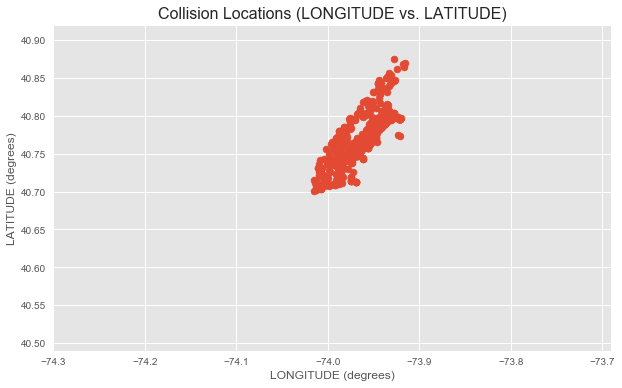

In [196]:
plt.scatter(df1['LONGITUDE'], df1['LATITUDE'])
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (LONGITUDE vs. LATITUDE)', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.show()

In [191]:
df['BOROUGH'] = df['BOROUGH'].replace(to_replace='RICHMOND', value='STATEN ISLAND')

/Users/nealrea/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [198]:
df.groupby('BOROUGH').size()

BOROUGH
BRONX            102825
BROOKLYN         237607
MANHATTAN        196238
NASSAU               37
QUEENS           224803
STATEN ISLAND     39068
dtype: int64

In [197]:
df['BOROUGH'] = df['BOROUGH'].replace(to_replace='NEW', value='MANHATTAN')

/Users/nealrea/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [201]:
df['BOROUGH'] = df['BOROUGH'].replace(to_replace='NASSAU', value='QUEENS')

/Users/nealrea/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [202]:
df.groupby('BOROUGH').size()

BOROUGH
BRONX            102825
BROOKLYN         237607
MANHATTAN        196238
QUEENS           224840
STATEN ISLAND     39068
dtype: int64

In [203]:
df = df.reset_index(drop=True)

In [207]:
print(len(df[df['BOROUGH'].isnull()]))
print(len(df[df['ZIP CODE'].isnull()]))
print(len(df))

0
0
800578


In [208]:
df.to_csv('collisions_cleaned.csv', index=False)